# 代码参考
[CS231n计算机视觉课程-KNN分类器](https://www.heywhale.com/mw/project/5e7b2bb498d4a8002d2d452e)

In [47]:
from torchvision import datasets
data_path='data-cifar10/'
cifar10=datasets.CIFAR10(data_path,train=True,download=True)
cifar10_val=datasets.CIFAR10(data_path,train=False,download=True)

Files already downloaded and verified
Files already downloaded and verified


In [48]:
dir(cifar10)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_integrity',
 '_format_transform_repr',
 '_is_protocol',
 '_load_meta',
 '_repr_indent',
 'base_folder',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'filename',
 'meta',
 'root',
 'target_transform',
 'targets',
 'test_list',
 'tgz_md5',
 'train',
 'train_list',
 'transform',
 'transforms',
 'url']

In [49]:
X_train, y_train=cifar10.data,np.array(cifar10.targets)
# 作为一个完整性检查，我们打印出训练和测试数据的大小。
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)

X_test, y_test=cifar10_val.data,np.array(cifar10_val.targets)

print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [ ]:
# # 在本练习中，为了更有效地执行代码，对数据进行了细分
# num_training = 5000
# mask = list(range(num_training))
# X_train = X_train[mask]
# y_train = y_train[mask]

# num_test = 500
# mask = list(range(num_test))
# X_test = X_test[mask]
# y_test = y_test[mask]
# 讲真，听人劝，吃饱饭，后边运行第一遍可以用所有的数据集感受下效果，之后还是用小个点的数据集吧。比较Knn还是偏向统计学的方法，效果不好，推理又慢

In [50]:
cifar10.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

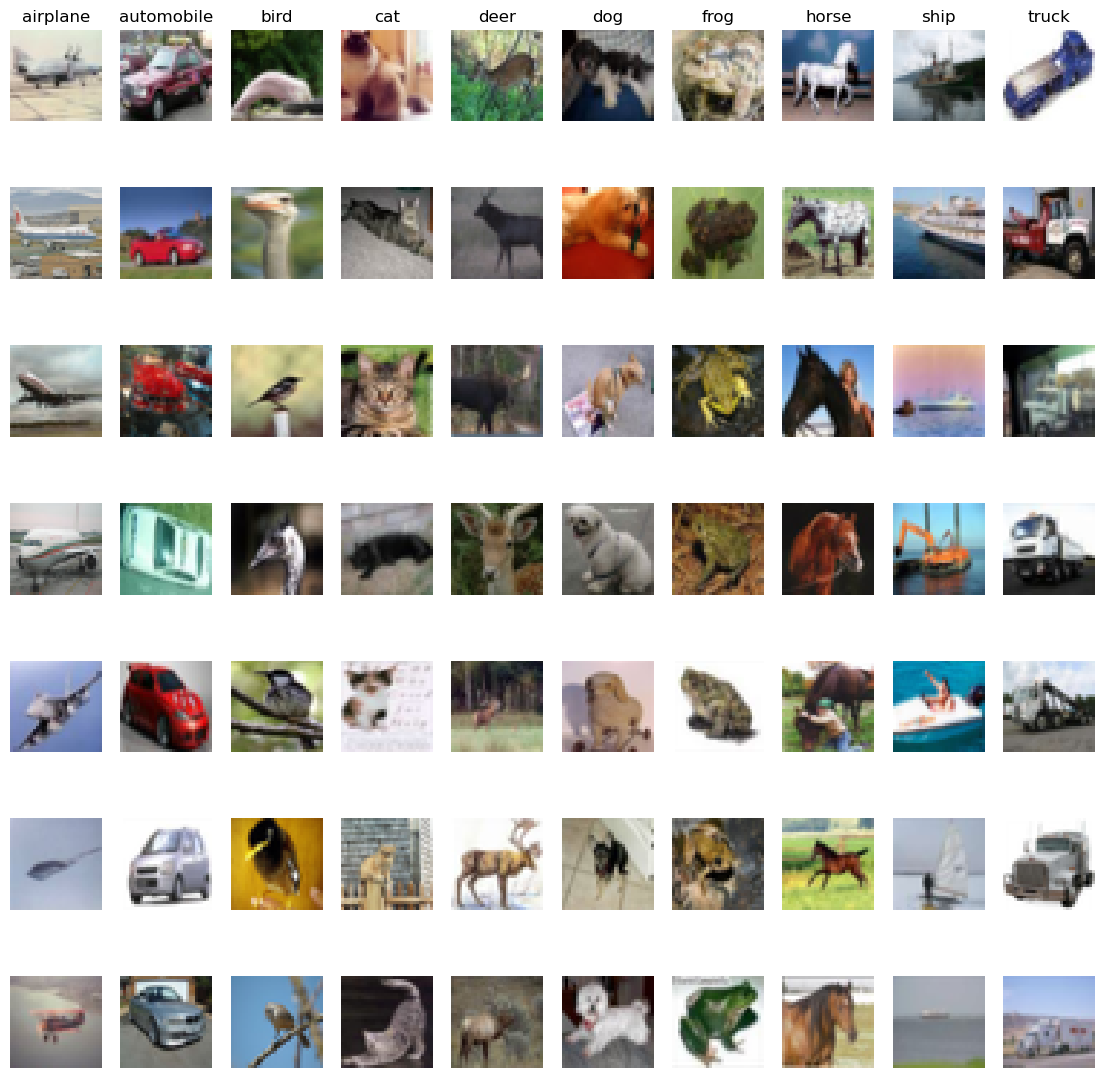

In [51]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest' # 设置图像的插值方式。该设置用于在显示图像时缩放图像的方式。此处设置为“最近邻插值”，即当图像缩放时每个像素点的颜色值是最近的像素点颜色。 
plt.rcParams['image.cmap'] = 'gray' # 设置绘图的默认颜色映射方案。这里设置为'gray'，绘图时将会显示为灰度图像。 

# 从数据集中可视化一些示例。
# 我们展示了一些例子的训练图像从每个类。
classes = cifar10.classes
num_classes = len(classes)
samples_per_class = 7
plt.figure(figsize=(14, 14))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y) #numpy来取
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [52]:
from sklearn.neighbors import KNeighborsClassifier

# 图片问题，用k临近算法的话，实际上就是一个32*32*3=3072维度的数据的分类问题
# 所以这里这么处理数据

# 将图像数据重新塑成行
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(50000, 3072) (10000, 3072)


In [55]:
knn = KNeighborsClassifier(n_neighbors=3) #n=3的时候

# 训练模型
knn.fit(X_train, y_train)

# 测试模型的准确率
accuracy = knn.score(X_test, y_test) #原来直接用score就行了，我还以为要用predict呢
print('测试集准确率为：', accuracy) #直接sklearn逃课

测试集准确率为： 0.3303


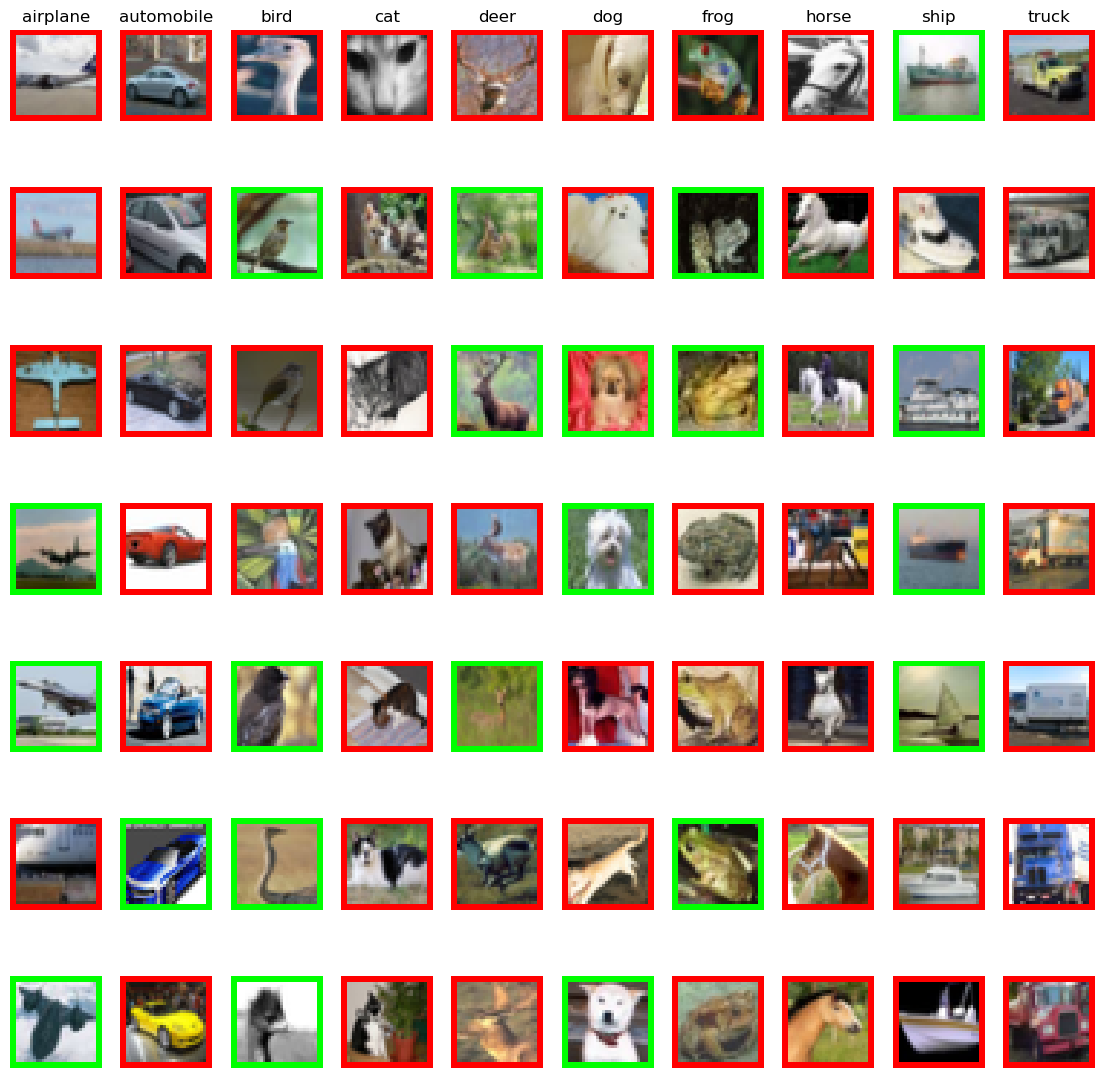

In [88]:
# 那个比较图就不画了，我只能想到二维的数据怎么画图，3072维度的特征的数据，想破脑子我都想不到怎么表达，
# 课上的图就是个意思，能想象就行。换个x1,x2然后拟合一个y的我还能画画
# 可以下一个作业了
# 不然整一点点可视化吧，因为看到后面的课上的图想到了

# 复用一下之前的代码

classes = cifar10.classes
num_classes = len(classes)
samples_per_class = 7
plt.figure(figsize=(14, 14))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_test == y) #numpy来取
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        y_pre=knn.predict(X_test[idx].reshape(1, -1))#测试集数据以及被变过了
        if y_pre==y:#对的用绿的
            x = X_test[idx].reshape(32,32,3) # 获取图片数据
            x[:, :2, :] = [0, 255, 0]
            x[:, -2:, :] = [0, 255, 0] # 左右边缘赋值为红色，[-2:, :] 中的 -2: 表示后两列，: 表示全部行，:表示全部通道，即RGB三通道；[255, 0, 0] 表示红色
            x[:2, :, :] = [0, 255, 0] # 上下边缘赋值为红色， [:, :2, :] 中的 :2 表示前两列，: 表示全部行，:表示全部通道，即RGB三通道；[255, 0, 0] 表示红色
            x[-2:, :, :] = [0, 255, 0]
        else:#错的用红的
            x = X_test[idx].reshape(32,32,3) # 获取图片数据
            x[:, :2, :] = [255, 0, 0]
            x[:, -2:, :] = [255, 0, 0] # 左右边缘赋值为红色，[-2:, :] 中的 -2: 表示后两列，: 表示全部行，:表示全部通道，即RGB三通道；[255, 0, 0] 表示红色
            x[:2, :, :] = [255, 0, 0] # 上下边缘赋值为红色， [:, :2, :] 中的 :2 表示前两列，: 表示全部行，:表示全部通道，即RGB三通道；[255, 0, 0] 表示红色
            x[-2:, :, :] = [255, 0, 0]
        plt.imshow(x.astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()
#绿色表示模型判断正确的，红色表示错误的

# 交叉验证寻找最佳超参数

啧，漏了一块内容，这里要补上。

这块似乎涉及到范数的理解，整理一下，因为看到那个别人的作业里面有着向量化加速运算啥的。

In [99]:
# 视频里面的五折交叉验证，挺好理解的。就是1/5交叉验证，跑一遍后会得到5个准确率，然后画图，去掉每个模型的5个准确率里面最高的和最低的。
# 取中间的画图，然后看图说话，可以更好的评估模型的效果，以及找到最优超参数

# 先取小量的数据集吧，学习用，全部跑一遍实在太慢了
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]
# 注意,在这里,我的交叉验证选择在训练集上跑的,这个是用来找最佳超参数的.
# 逻辑是这样的,先用这种五折交叉验证找到最佳超参数,然后用这个超参数在整个训练集上训练模型,最后用验证集验证.
# 就是为了让你使用的knn中的超参数n,能更有说服力.

from sklearn.model_selection import cross_val_score

scores_list=[]
# 写个循环,超参数设定为1到11,建立绘图的元素,用来评价
for i in range(1,11+1):
    knn_cross = KNeighborsClassifier(n_neighbors=i) #n=i的时候
    # 交叉验证模型
    scores = cross_val_score(knn_cross, X_train, y_train, cv=5)#会得到五个结果
    scores_list.append((i,scores))

In [100]:
scores_list

[(1, array([0.266, 0.244, 0.274, 0.279, 0.261])),
 (2, array([0.234, 0.213, 0.243, 0.252, 0.241])),
 (3, array([0.246, 0.24 , 0.243, 0.267, 0.243])),
 (4, array([0.265, 0.257, 0.276, 0.29 , 0.264])),
 (5, array([0.257, 0.25 , 0.285, 0.286, 0.269])),
 (6, array([0.262, 0.263, 0.28 , 0.275, 0.275])),
 (7, array([0.267, 0.269, 0.27 , 0.298, 0.271])),
 (8, array([0.267, 0.271, 0.282, 0.292, 0.272])),
 (9, array([0.266, 0.266, 0.287, 0.289, 0.277])),
 (10, array([0.275, 0.284, 0.286, 0.287, 0.277])),
 (11, array([0.277, 0.277, 0.284, 0.283, 0.271]))]

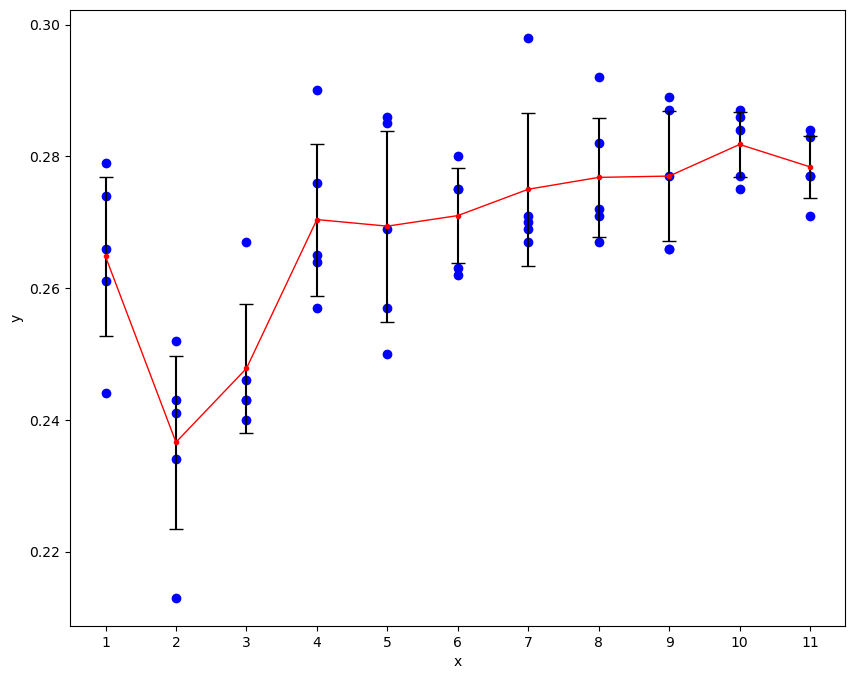

In [101]:
# 准备绘图
# 绘图
fig, ax = plt.subplots()

for x, y in scores_list:
    ax.scatter([x]*5, y, color='blue')

# 求平均值和标准差
means = [np.mean(y) for x, y in scores_list]#平均值
stds = [np.std(y) for x, y in scores_list]#求标准差

# 绘制线条和柱状图
ax.errorbar([x[0] for x in scores_list], means, yerr=stds, fmt='o', color='r', markersize=3, capsize=5, ecolor='black')
ax.plot([x[0] for x in scores_list], means, color='r', linewidth=1)

ax.set_xticks([x[0] for x in scores_list])
ax.set_xticklabels([x[0] for x in scores_list])
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

#就不纠结最有参数了，主要是数据集还挺小的，准确率也不高

In [ ]:
# 往下看，懒了，暂时不想写了，下一课吧